<a href="https://colab.research.google.com/github/zhong338/MFM-FM5222/blob/main/Week6_SingleVarReg2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Single Variable Linear Regression II

# MLE View


We continue our discussion by looking at single variable linear regression.  Here we think of $Y$ as a Random Variable.  We can think of $X$ as a random variable as well, but we don't have to.  It can be just a variable.

The model then treats the residual $\epsilon = \alpha + \beta X - Y$ as a random variable.  The underlying assumption is that

$$\epsilon \sim \mathcal{N}(0, \sigma^2)$$

That is, the residuals are normally distributed with a mean of zero.  Futhermore, it is assumed that the residuals are IID (they are pure noise).

In this formulation, the model will have $3$ parameters: $\alpha, \beta$, and $\sigma$.

Let us approach this just like we would an MLE probelm.

Given the data and our parameters choices, we can obsserve the values 


$\epsilon_i =  \alpha + \beta X_i - Y_i$


The liklihood function is

$L = \Pi_{1=1}^N \frac{1}{\sigma}\phi\left(\frac{\epsilon_i}{\sigma}   \right)$

where 

$\phi(x) = \frac{1}{\sqrt{2\pi}}e^{-\frac{x^2}{2}}$

The log-liklihood is

$$\ell(\alpha, \beta, \sigma;\{ x_i \}) =  \sum_{i=1}^N \left(\ln\left( \frac{1}{\sigma}\phi\left(\frac{\epsilon_i}{\sigma}   \right)   \right)                    \right) \\
= \sum_{i=1}^N \left(-\ln(\sigma) -\frac{1}{2} \ln(2\pi) - \frac{\epsilon_i^2}{2\sigma^2}                      \right)$$


We note first that $\epsilon_i^2$ does not depend on $\sigma$, so maximizing the log-liklihood requires minimizing 

$$ \sum_{i=1}^N \epsilon_i^2$$


which means that the MLE values for $\alpha$ and $\beta$ are the same as before (they minimize the sum squared residuals).


Turning to $\sigma$, we calculate

$$ \frac{\partial}{\partial \sigma} \ell(\alpha, \beta, \sigma;\{ x_i \})= \sum_{i=1}^N\left(-\frac{1}{\sigma}   +\frac{\epsilon_i^2}{\sigma^3}\right)$$

Setting this to zero, we see that we have the estimate

$$\hat{\sigma}^2 = \frac{1}{N}\sum_{i=1}^N \hat{\epsilon}_i^2$$

where

$$\hat{\epsilon}_i =  \hat{\alpha} + \hat{\beta} X_i - Y_i$$


$$\hat{\alpha} =\frac{\left( \sum_{i=1}^N x_i^2 \right)\left( \sum_{i=1}^N y_i \right) - \left( \sum_{i=1}^N x_i \right)\left( \sum_{i=1}^N x_i y_i\right)}{\Delta} $$

$$\hat{\beta} = \frac{N\left( \sum_{i=1}^N x_iy_i \right) - \left( \sum_{i=1}^N x_i \right)\left( \sum_{i=1}^N  y_i\right)}{\Delta} $$

and 

$$\Delta = N\left( \sum_{i=1}^N x_i^2 \right) - \left( \sum_{i=1}^N x_i \right)^2$$


Note that we are use the "hat" notation now to indicate that we are estimating the values of our parameters.










### A little more on $\hat{\alpha}$ and $\hat{\beta}$



Taking our expressions for $\hat{\alpha}$ and $\hat{\beta}$ above and  dividing both numerators  and denominators by $N^2$, we see that

$$\hat{\alpha} = \frac{m_2(x) \bar{y} - \bar{x} \frac{1}{N}\sum_{i=1}^N x_iy_i}{\mathrm{Var}(x)}$$

and

$$\hat{\beta} = \frac{\frac{1}{N}\sum_{i=1}^N x_iy_i -    \bar{y}  \bar{x} }{\mathrm{Var}(x)} = \frac{\mathrm{Cov}(x,y)}{\mathrm{Var}(x)}$$


Now, digging deeper on $\hat{\alpha}$ observe that $\frac{1}{N}\sum_{i=1}^N x_iy_i =  \mathrm{Cov}(x,y) - \bar{x}\bar{y}$



$$\hat{\alpha} = \frac{m_2(x) \bar{y} - \bar{x} \left(\mathrm{Cov}(x,y) - \bar{x}\bar{y}    \right)}{\mathrm{Var}(x)}\\
=\frac{\left(m_2(x) - \bar{x}^2\right) \bar{y} - \bar{x}\mathrm{Cov}(x,y)}{\mathrm{Var}(x)}\\
= \bar{y} - \hat{\beta} \bar{x}$$



We see that $\hat{\beta}$ relates directly to how $x$ and $y$ move together and that $\hat{\alpha}$ intuitively is set to satisfy the model exactly *on average*


NOTE: This last observation is just that  $\sum_{i=1}^N \hat{\epsilon}_i = 0$



Additionally, we can write $\hat{\beta}$ as a weighted average of $y_i$ where the weights are

$$w_i = \frac{x_i - \bar{x}}{N\mathrm{Var}(x)}$$


This means, among other things, that that "farther away" $x_i$ is from the mean $\bar{x}$, the more influence $y_i$ has on the regession coefficient.  This is well known deficiency in linear regression, since it can be overly sensitive to outliers.

### statsmodels


Fortunately for us, we can readily do regessions using python.  The statsmodels package is nice in that it gives some informative output.  It can also set up to look similar to R.

Let's do some examples with some generated data.



In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


import statsmodels.api as sm



/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
#make data

N = 50

alpha = 15
beta = 2 

sigma = 10


#slope is 2, intercept is 15.

# Noise sigma is 10

xdata = np.random.uniform(low = 0, high = 100, size = N)
ydata = alpha + beta*xdata + np.random.normal(scale =5, size = N )



Let's make a plot

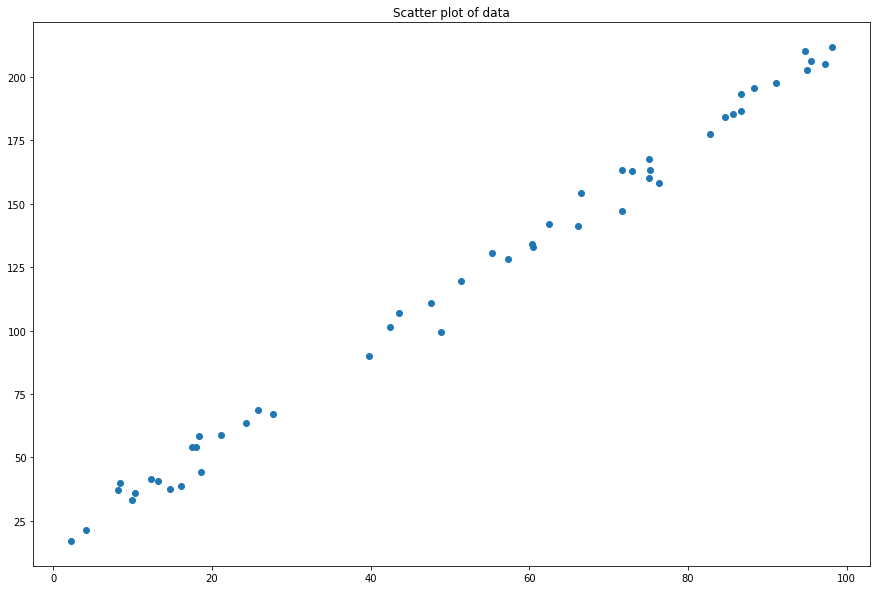

In [ ]:
plt.figure(figsize = (15,10))
plt.scatter(xdata, ydata)

plt.title("Scatter plot of data")
plt.show()

Now we use statsmodels to get our hit. FYI,  OLS stands for "Ordinary Least Squares"

We need to add a column of ones to xdata if we want to have an intercept.

In [ ]:
xdataC = sm.add_constant(xdata)
xdataC

array([[ 1.        ,  2.29352665],
       [ 1.        , 14.67245191],
       [ 1.        , 13.17076509],
       [ 1.        , 66.51185152],
       [ 1.        , 91.05954199],
       [ 1.        , 18.02406093],
       [ 1.        , 18.57046921],
       [ 1.        , 24.27468137],
       [ 1.        , 95.02595436],
       [ 1.        , 98.17123258],
       [ 1.        , 88.32435556],
       [ 1.        , 75.06829373],
       [ 1.        , 16.12926009],
       [ 1.        , 55.24799756],
       [ 1.        , 12.29226981],
       [ 1.        , 86.64537611],
       [ 1.        , 76.34103748],
       [ 1.        ,  4.15925538],
       [ 1.        , 18.42368704],
       [ 1.        , 57.25069506],
       [ 1.        , 66.12436476],
       [ 1.        ,  9.87816878],
       [ 1.        , 71.73667629],
       [ 1.        , 21.10553349],
       [ 1.        , 75.21792589],
       [ 1.        , 27.65314223],
       [ 1.        , 85.6952715 ],
       [ 1.        , 82.81073994],
       [ 1.        ,

In [ ]:
model = sm.OLS(ydata, xdataC)
result = model.fit()

result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.994
Model:                            OLS   Adj. R-squared:                  0.994
Method:                 Least Squares   F-statistic:                     8238.
Date:                Wed, 23 Feb 2022   Prob (F-statistic):           2.35e-55
Time:                        22:09:19   Log-Likelihood:                -148.52
No. Observations:                  50   AIC:                             301.0
Df Residuals:                      48   BIC:                             304.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         14.8623      1.322     11.246      0.000      12.205      17.520
x1             1.9942      0.022     90.762      0.000       1.950       2.038
==============================================================================
Omnibus:                        3.715   Durbin-Watson:                   2.393
Prob(Omnibus):                  0.156   Jarque-Bera (JB):                3.117
Skew:                          -0.611   Prob(JB):                        0.210
Kurtosis:                       3.050   Cond. No.                         117.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Eventually, we will be able to interpret most of this output.  But here is some things we can immediately say.


The estimated intercept and slopes are both pretty accurate.

The standard errors, t-value, etc, are asssuming that the model is correctly specified. 

### Plot of result

Let's make a plot of our fit along with our data

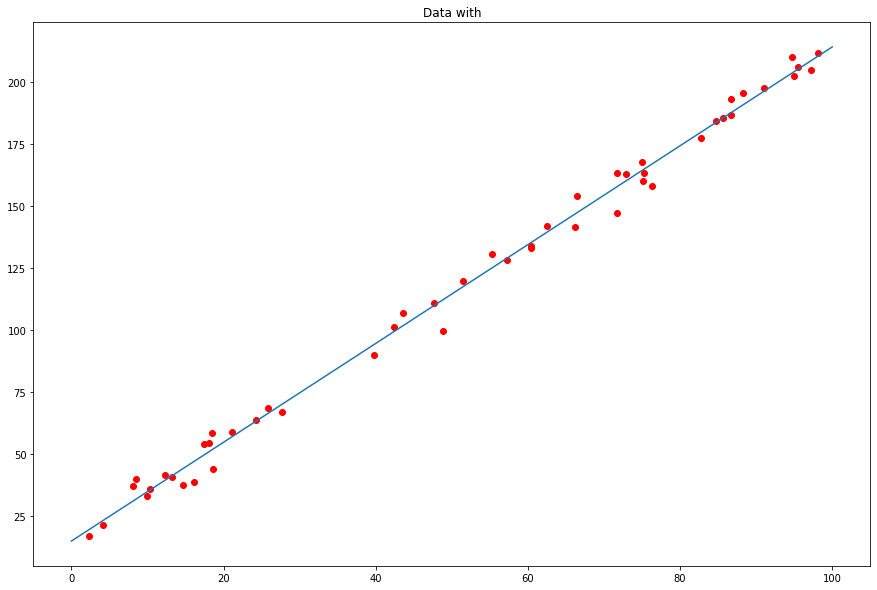

In [ ]:
x= np.linspace(0,100)
x1 = sm.add_constant(x)

plt.figure(figsize = (15,10))
plt.scatter(xdata, ydata, color= 'r', label = "Data Points")

plt.title("Data with")

plt.plot(x, result.predict(x1), label = "Linear Fit")
plt.show()




### Example with outlier

To show the exaggerated impact of outliers, we will toss in a single outlier point with $x_O= 200$. If true to model, then we wouldd have $y_O= 15 + 2(200) + \epsilon_O = 415 + \epsilon_O$. 

But suppose that this data point is due to some measurement error, so that $y_O = 215$.  Let's see what happens too our regression.


In [ ]:
xO = 200
yO = 15 +2*xO - 200

xdataO = np.append(xdata,xO)
ydataO = np.append(ydata, yO)

xdataOC = sm.add_constant(xdataO)


modelO = sm.OLS(ydataO, xdataOC)
result = modelO.fit()

result.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.862
Model:                            OLS   Adj. R-squared:                  0.859
Method:                 Least Squares   F-statistic:                     305.9
Date:                Wed, 23 Feb 2022   Prob (F-statistic):           1.04e-22
Time:                        22:12:01   Log-Likelihood:                -233.05
No. Observations:                  51   AIC:                             470.1
Df Residuals:                      49   BIC:                             474.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         33.5833      5.942      5.652      0.000      21.643      45.524
x1             1.5789      0.090     17.489      0.000       1.397       1.760
==============================================================================
Omnibus:                       71.732   Durbin-Watson:                   1.219
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              856.652
Skew:                          -3.628   Prob(JB):                    9.56e-187
Kurtosis:                      21.721   Cond. No.                         117.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Here is a visualization of the one data point messed things up.

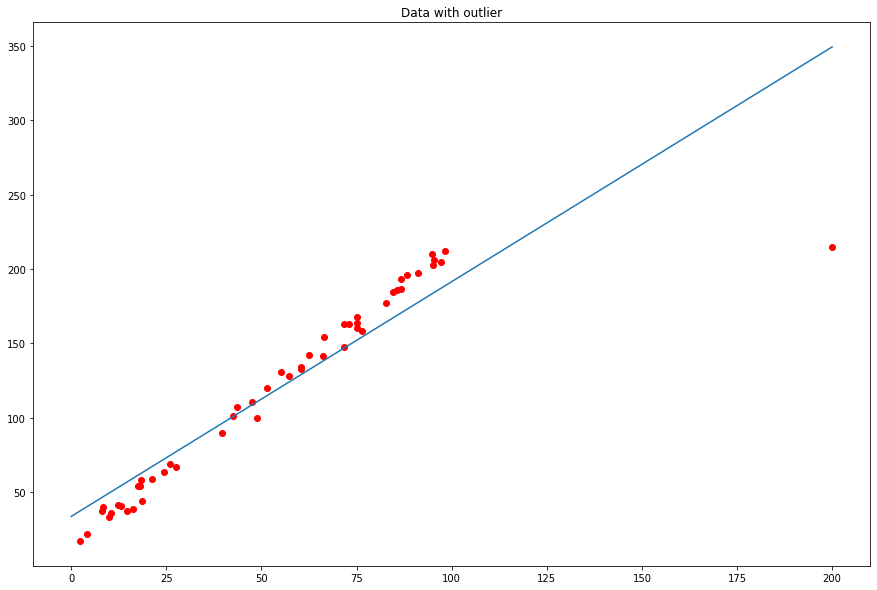

In [ ]:
x= np.linspace(0,200)
x1 = sm.add_constant(x)

plt.figure(figsize = (15,10))
plt.scatter(xdataO, ydataO, color= 'r', label = "Data Points")

plt.title("Data with outlier")

plt.plot(x, result.predict(x1), label = "Linear Fit")
plt.show()

Note that had the one bad data point for $y$ not been associate with a large $x$ (relative to the mean of $x$), things would have been OK.

In [ ]:
xO = 50
yO = 15 +2*xO - 200

xdataO = np.append(xdata,xO)
ydataO = np.append(ydata, yO)

xdataOC = sm.add_constant(xdataO)


modelO = sm.OLS(ydataO, xdataOC)
result = modelO.fit()

result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.827
Model:                            OLS   Adj. R-squared:                  0.824
Method:                 Least Squares   F-statistic:                     234.5
Date:                Wed, 23 Feb 2022   Prob (F-statistic):           2.60e-20
Time:                        22:13:16   Log-Likelihood:                -242.42
No. Observations:                  51   AIC:                             488.8
Df Residuals:                      49   BIC:                             492.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         10.6237      7.833      1.356      0.181      -5.118      26.365
x1             2.0005      0.131     15.315      0.000       1.738       2.263
==============================================================================
Omnibus:                      111.144   Durbin-Watson:                   1.077
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4365.642
Skew:                          -6.634   Prob(JB):                         0.00
Kurtosis:                      46.340   Cond. No.                         117.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Graph with outlier "in the middle" of x range

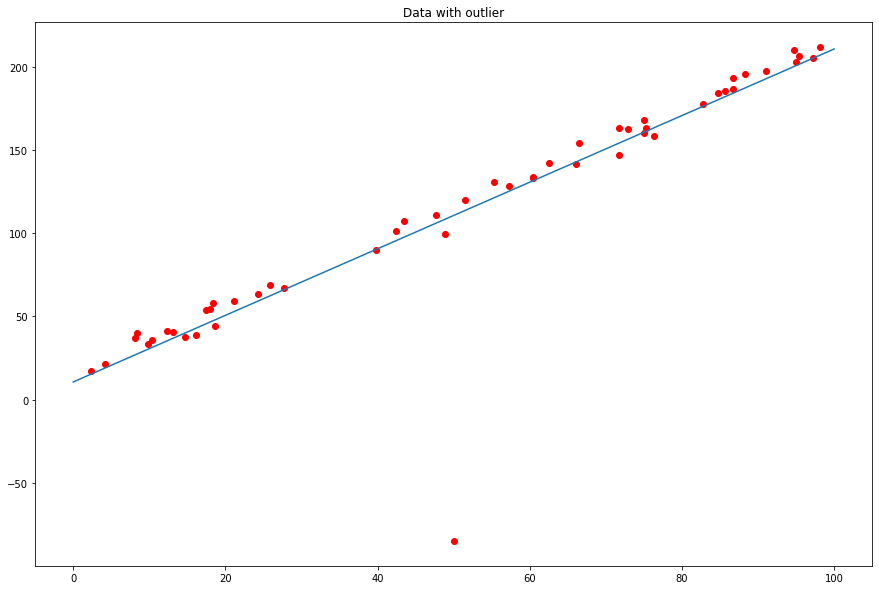

In [ ]:
x= np.linspace(0,100)
x1 = sm.add_constant(x)

plt.figure(figsize = (15,10))
plt.scatter(xdataO, ydataO, color= 'r', label = "Data Points")

plt.title("Data with outlier")

plt.plot(x, result.predict(x1), label = "Linear Fit")
plt.show()